# Comunicados de Política Monetaria
## Parte 1.

En este notebook crearemos un pandas DataFrame con las decisiones de política monetaria de Banxico y haremos un análisis de la información recabada.

In [25]:
import re
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime
from tqdm.notebook import tqdm
from time import sleep
import locale
locale.setlocale(locale.LC_TIME, "es_ES.UTF-8")
from io import BytesIO
import PyPDF2
from PyPDF2 import PdfFileReader
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
import nltk
from nltk import corpus
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lizbeth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lizbeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 4)

La información de decisción de política monetaria se encuentra en la siguiente url.

In [3]:
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")

* Entra a `url` y analiza la página.

In [4]:
print(url)

https://www.banxico.org.mx/publicaciones-y-prensa/anuncios-de-las-decisiones-de-politica-monetaria/anuncios-politica-monetaria-t.html


* Como podemos observar, la url objetivo contiene
    * las fechas de decisiones de política monetaria,
    * el resumen de las decisiones de política monetaria y
    * una url que nos dirige a un pdf con el texto completo del Anuncio de Política Monetaria.
    
<h3 style="color:crimson">Ejercicio</h3>

1. Por medio de `requests_html`, extrae los tres puntos antes mencionados y guárdalos dentro de un DataFrame con columnas `"date"`, `"text"` y `"url"`;
2. Con el dataframe seleccionado, filtra todos comunicados anteriores al 15 de febrero de 2008, i.e., queremos todos los comunicados a partir del 15 de Febrero de 2008;
3. Guarda tu DataFrame dentro de un archivo `.pkl` con nombre `comunicados-banxico.pkl`: **hint:** Revisa el uso del método `to_pickle`.

In [5]:
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")
with HTMLSession() as sess:
    r = sess.get(url)
r

#se busca el primer id de la pagina
divpage = r.html.find("div[id='content']", first=True)

#se busca dentro de 'content' todos los elementos de 'tr'
papers_date=divpage.find("tr")

In [6]:
#se busca la información deseada, la fecha, el titulo de cada texto y la url
values = []
for date_secc, papers_secc,url_secc in zip(papers_date, papers_date, papers_date):
    #extrae fechas de cada comunicado
    date = date_secc.find("td[class='bmdateview']", first=True).text
    #para la fecha, se cambia el formato
    date_form=datetime.strptime(date, '%d/%m/%y')
    #extrae titulo de cada comunicado
    text_pag = papers_secc.find("td[class='bmtextview']", first=True).text
    #extrae url de cada comunicado
    abstract_url = url_secc.find("a[href]", first=True).absolute_links
    abstract_url, *_ = abstract_url
    #Se guardan los tres datos en un arreglo
    values.append([date_form, text_pag, abstract_url])     

In [7]:
#se genera el panda DataFrame con el arreglo anterior, donde se coloca el nombre de la columa y date lo convierto a indice
df_values = pd.DataFrame(values, columns=["date", "text", "url"]).set_index("date")
#se toman los comunicados del 2008-02-15 a la fecha
df_values_f=df_values.loc[:'2008-02-15',:].sort_values('date')
df_values_f.head()

,text,url
date,,
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


In [8]:
#se guarda el dataFrame obtenido en un archivo .pkl
df_values_f.to_pickle("../Proyecto_Modulo_3/comunicados-banxico.pkl")

<h3 style="color:crimson">Ejercicio</h3>

Por medio del método `str.extract` para un pandas Series, crea una nueva columna `"category"` que extraiga del texto si la tasa se 
1. `"mantiene"`
2. `"incrementa"`
3. `"disminuye"`

In [9]:
#se genera una nueva columna con las palabras incrementa,mantiene,disminuye extraidas del text
df_values_f['category'] = df_values_f.text.str.extract('(incrementa|mantiene|disminuye)')
df_values_f.head()

,text,url,category
date,,,
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,incrementa


<h3 style="color:crimson">Ejercicio</h3>

Cuenta las veces en las que la tasa se mantuvo, se incrementó o se disminuyó.

In [10]:
#se cuentan las repeticiones de la columna category
cont=df_values_f.category.value_counts()
cont

mantiene      72
incrementa    18
disminuye     16
Name: category, dtype: int64

<h3 style="color:crimson">Ejercicio</h3>

Reproduce la siguiente figura sobre los comunicados de prensa de Banxico:
1. La gráfica de la izquierda representa una serie de tiempo sobre los comunicados de banxico. Si `y=1`, la tasa de referencia se incrementó; si `y=0`, la tasa se mantuvo; finalmente, si `y=-1`, la tasa disminuyó.
2. La gráfica de la derecha es una gráfica de barras del ejercicio anterior

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


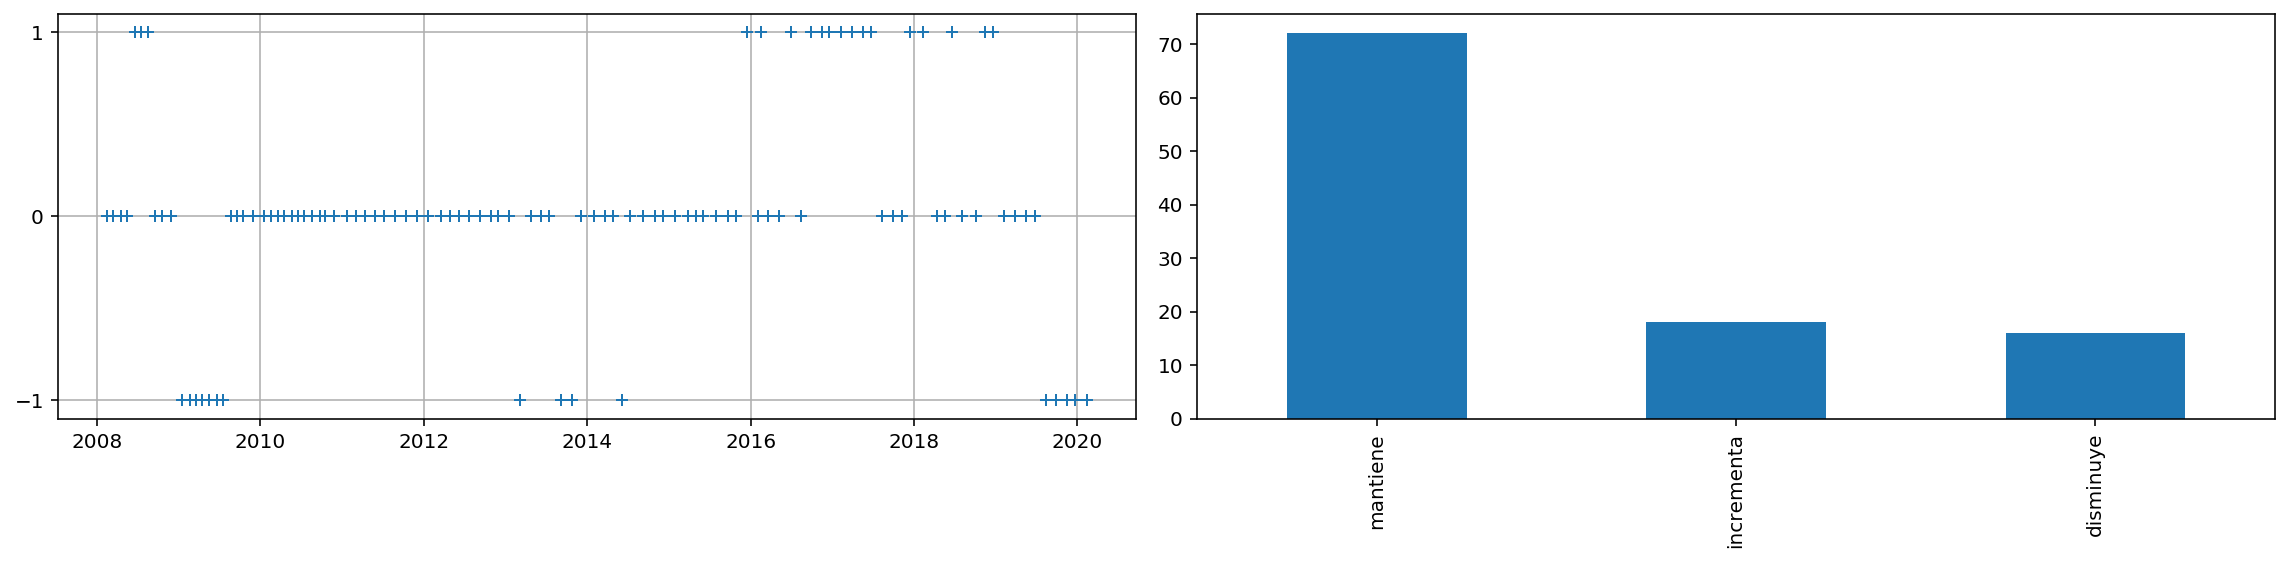

In [11]:
#se reenombran
valor_c = {'mantiene' : 0 , 'incrementa' : 1, 'disminuye' : -1}
g=df_values_f.category.map(valor_c)

#se generan las dos graficas
fig, axes= plt.subplots(ncols=2, figsize=(16,4))
plt.setp(axes[0], yticks=([1, 0, -1]))
axes[0].grid()
axes[0].plot(g.index,g, '+')
df_values_f.category.value_counts().plot(kind='bar',ax=axes[1])
fig.tight_layout()

<h3 style="color:crimson">Ejercicio</h3>

Agrupa por año y cuenta el número de comunicados en un año para cada categoría.

In [12]:
#se agrupa por año y por category para poder contar las repeticiones de category
comunicado=df_values_f.category.groupby(df_values_f.index.year).value_counts()
comunicado.head()

date  category  
2008  mantiene       7
      incrementa     3
2009  disminuye      7
      mantiene       4
2010  mantiene      11
Name: category, dtype: int64

<h3 style="color:crimson">Ejercicio</h3>

Con el resultado anterior, replica la siguiente gráfica

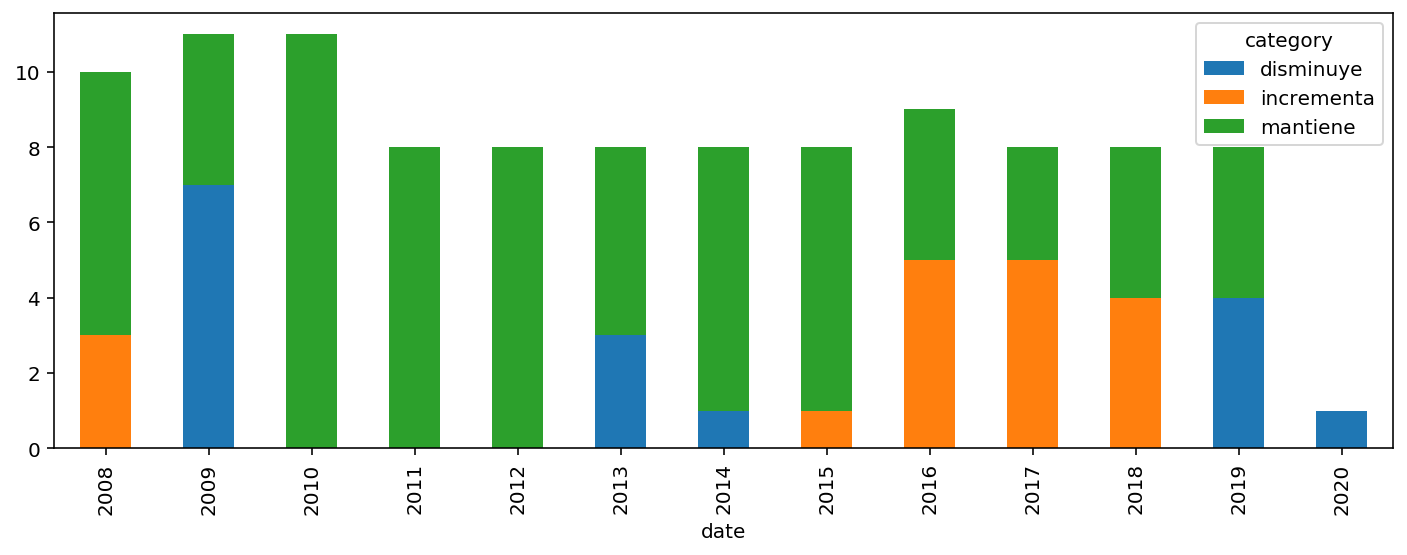

In [13]:
comunicado.unstack(level=1).plot.bar(stacked=True)


## Parte 2.

*Unicamente pandas y numpy, matplotlib, seaborn. 

Con la información obtenida modelar Naïve Bayes, si un documento dado pertenece a la clase mantien,incrementa o disminuye.

Pasos:
1. Descargar pdf's.
2. Limpiar los datos.
3. Eliminar de todos los archivos las palabras que contengan mantien,incrementa o disminuye.
4. Parte los documentos entre un set de entrenamiento (0.8) y uno de prueba (0.2).
5. Entrena el modelo con los documentos de entrenamiento y valida el resultado con una matriz de confusión usando la base de     prueba.

In [14]:
#Descargar los pdf's y guardarlos en una carpeta.

for i in range(0,len(df_values_f)):
    r_1=requests.get(df_values_f.url[i],stream = True)
    paper=r_1.content
    #se guardan con el nombre de category y el date
    fil = str(df_values_f.category[i])+str(df_values_f.index[i]).replace(":", "-")
    #se guardan en la ruta deseada
    full_path=os.path.join("descargas",fil + ".pdf")
    with open(full_path,"wb") as f:
        f.write(paper)


In [15]:
#Para cada pdf descargadó se lee y el texto se guarda en una lista dependiendo la categoria a la que pertecene.
lista1=[]
lista2=[]
lista3=[]
for j in range(0,len(df_values_f)):
    #nombre del archivo
    fil = str(df_values_f.category[j])+str(df_values_f.index[j]).replace(":", "-")
    #ruta donde se encuentra el archivo
    pdf_document = "../Proyecto_Modulo_3/descargas/"+fil+".pdf"
    
    #se lee cada pdf
    with open(pdf_document, "rb") as file:  
        pdf = PdfFileReader(file)
        texto=""
        for p in range(0,pdf.getNumPages()):
            texto += pdf.getPage(p).extractText() + "\n"
            texto = " ".join(texto.replace("\n", "").strip().split())
            texto = " ".join(word.strip(string.punctuation) for word in texto.split() if word.isalpha())
    
    #para el texto extraido se revisa a que categoría pertenece y se guarda en la lista correspondiente       
    if fil[:10]=="incrementa":
        lista1.append(texto) 
    elif fil[:9]=="disminuye":
        lista2.append(texto) 
    elif fil[:8]=="mantiene":
        lista3.append(texto)  

#se genera un diccionario para cada categoría y el arreglo de los textos de esa categoría
diccionario={"incrementa":lista1,"disminuye":lista2,"mantiene":lista3}

#se valida que cada llave tenga el mismo conteo de textos como se menciono arriba
{quien: len(diccionario) for quien, diccionario in diccionario.items()}

{'incrementa': 18, 'disminuye': 16, 'mantiene': 72}

In [16]:
#se renombra cada palabra
k1, k2,k3 = "mantiene", "incrementa","disminuye"

In [17]:
#se genera una función que sirve la limpiar cada texto
def limpia_dialogo(doc):
    limpio=doc.lower()
    limpio=re.sub(" [^\w ]"," ",limpio)
    return limpio

In [18]:
#para cada llave del diccionario, se limpian los textos que contienen y se guardan en una nueva variable.
D1 = [limpia_dialogo(doc) for doc in diccionario[k1]]
D2 = [limpia_dialogo(doc) for doc in diccionario[k2]]
D3 = [limpia_dialogo(doc) for doc in diccionario[k3]]

#con el train_test_split se crean dos conjuntos, uno que es de entrenamiento (0.8) y uno de prueba (0.2);
#por cada Di (donde Di contiene los textos limpios de cada llave del diccionario)
D1, D1_test = train_test_split(D1, test_size=0.2)
D2, D2_test = train_test_split(D2, test_size=0.2)
D3, D3_test = train_test_split(D3, test_size=0.2)

#se toma la longitud de cada D y se guarda la suma en una nueva variable N
N1 = len(D1)
N2= len(D2)
N3=len(D3)
N= N1+N2+N3


In [19]:
#con el stopwords se quitan las palabras de uso comun y además quitamos las palabras "mantiene", "incrementa","disminuye".
stopwords = corpus.stopwords.words("spanish")
stopwords = [unidecode(word) for word in stopwords]
stopwords.extend(["mantiene", "incrementa","disminuye"])

In [20]:
#para cada Di limpio se genera un listado de palabras únicas y se guarda en Vi
V1 = [palabra for dialogo in D1 for palabra in dialogo.split()
      if palabra not in stopwords]

V2 = [palabra for dialogo in D2 for palabra in dialogo.split()
      if palabra not in stopwords]

V3 = [palabra for dialogo in D3 for palabra in dialogo.split()
      if palabra not in stopwords]


#se genera el conjunto V donde se unen todas las palabras unicas de cada Vi
V = set(V1) | set(V2) | set(V3)
#se genera un DataFrame con indices de V
vocab = pd.DataFrame(index=V)


# para cada Vi se realiza un conteo de cuantas veces se repite cada palabra que esta en el arreglo.
V1_c = pd.Series(V1, name="k1").value_counts()
V2_c = pd.Series(V2, name="k2").value_counts()
V3_c = pd.Series(V3, name="k3").value_counts()


# se calcula la probabilidad de que cada palabra este en cada uno de los conjuntos Vi_c y se imprime
L = (vocab.join(V1_c, how="left")
          .join(V2_c, how="left")
          .join(V3_c, how="left"))

L = L.fillna(0) + 1
L = L / L.sum(axis=0)
L.sample(10, random_state=314)

,k1,k2,k3
cíclicas,0.000189,0.000191,0.000137
composición,0.000038,0.000095,0.000412
panorama,0.000567,0.000572,0.000412
pequeño,0.000076,0.000095,0.000137
expectativa,0.000718,0.000762,0.000686
certidumbre,0.000151,0.000286,0.000549
terminación,0.000038,0.000095,0.000274
empresas,0.000076,0.000095,0.000137
adopte,0.000038,0.000191,0.000137
presentarían,0.000038,0.000095,0.000274


In [21]:
#Se calcula el logaritmo de L y se saca el logaritmo de cada Ni con respecto a N
log_L = np.log(L)

log_prior_k1 = np.log(N1 / N)
log_prior_k2 = np.log(N2 / N)
log_prior_k3 = np.log(N3 / N)

#Se guarda en un arreglo
log_priors = np.array([log_prior_k1, log_prior_k2,log_prior_k3])

## Probando el modelo

In [22]:
#Se imprime el conjunto de prueba, estos valores se tiene que parecer a los valores del conjunto de entrenamiento.
print("Valores del conjunto de prueba: ",  "\nMantiene: ",  len(D1_test) , "\nIncrementa: " ,len(D2_test),"\nDisminuye: " ,len(D3_test))

Valores del conjunto de prueba:  
Mantiene:  15 
Incrementa:  4 
Disminuye:  4


In [23]:
#se genera una lista donde cada ki se multiplica por la longitud de cada Di_test (conjunto de prueba)

D_test = D1_test + D2_test+D3_test
y_test = ["k1"] * len(D1_test) + ["k2"] * len(D2_test) + ["k3"] * len(D3_test)

#se genera una lista donde cada ki sale por medio del conjunto de entrenamiento
yhat_test = []

for d_test in D_test:
    f = set([palabra for palabra in d_test.split() if palabra in V])
    res = log_L.loc[f].sum(axis=0) + log_priors
    yhat_test.append(res.idxmax())

In [24]:
#Se genera la matriz de confusion, la cual indica el número de coinsidencias entre el conjunto de prueba
#y el conjunto de entrenamiento; con esto podemos validar cuantos falsos positivos y falsos negativos se optuvieron. 
#Además de que en la diogonal se indica cuantos si coincidieron.

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat_test)

array([[11,  3,  1],
       [ 1,  3,  0],
       [ 1,  0,  3]], dtype=int64)

El modelo se ajusta bien, dado que se acerca a los datos obtenidos en el conjunto de prueba, sólo algunas entradas no coincidieron pero son minimas.
